## Well basics

Some preliminaries...

In [1]:
import striplog
striplog.__version__

'0.6.1'

In [2]:
import welly
welly.__version__

'0.1.0'

In [3]:
from welly import Well
import lasio

In [8]:
LogFile = 'P-129_out.LAS'

In [9]:
las = lasio.read(LogFile)

In [11]:
for k, v in las.well.items():
    print (k, '****', v.value)

STRT **** 1.0668
STOP **** 1939.1376
STEP **** 0.1524
NULL **** -999.25
COMP **** Elmworth Energy Corporation
WELL **** Kennetcook #2
FLD **** Windsor Block
LOC **** Lat = 45* 12' 34.237" N
PROV **** Nova Scotia
UWI **** Long = 63* 45'24.460  W
LIC **** P-129
CTRY **** CA
DATE **** 10-Oct-2007
SRVC **** Schlumberger
LATI **** 
LONG **** 
GDAT **** 
SECT **** 45.20 Deg N
RANG **** PD 176
TOWN **** 63.75 Deg W


In [12]:
w1 = Well.from_las(LogFile)

In [13]:
w1.curves['GR']

Curve([ 46.69865036,  46.69865036,  46.69865036, ...,  92.24622345,
        92.24622345,  92.24622345])

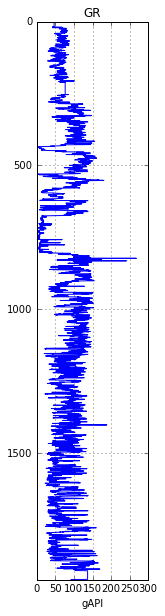

In [15]:
%matplotlib inline
w1.curves['GR'].plot()

In [16]:
import numpy as np
from striplog import Striplog, Legend, Lexicon, Interval, Component

In [17]:
imgfile = 'P-129_280_1935.png'

In [18]:
legend = Legend.builtin('NSDOE')

In [19]:
stripimg = Striplog.from_img(imgfile, 280, 1935, legend=legend)

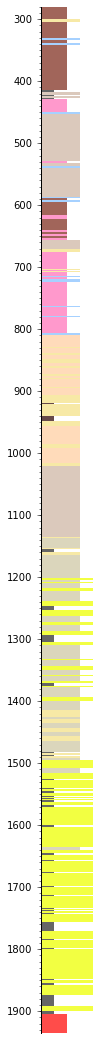

In [20]:
stripimg.plot(legend=legend, ladder=True)

In [125]:
# Get a Decor for curves

In [126]:
from striplog import Decor, Component, Legend

In [127]:
logcsv = 'data/Petrophysics_display_template.csv'
with open (logcsv, "r") as myfile:
    data=myfile.read()


In [128]:
l = Legend.from_csv(data)

In [129]:
l[20]

midline,
xleft,0.6
logarithmic,linear
linecolor,blue (blue bird)
xticks,"0.4,0.3,0.2,0.1,0.0"
fill_left_color,
fill_right_color,
hatch,None
fill_right_cond,
track,2.0
xlabel_fmt,


In [130]:
d = l.get_decor(Component({'mnemonic':'GR'}))
d.colour
d.component
d.linecolor
d.track
xtix = d.xticks

In [131]:
d.xticks.split(',')

['30', '60', '90', '120', '150', '180']

In [132]:
def get_linestyle(decor):
    kwargs = {}
    kwargs['color'] = decor.colour
    return kwargs

In [133]:
def get_axstyle(decor):
    kwargs = {}
    kwargs['xticks'] = list(map(float, decor.xticks.split(',')))
    kwargs['xscale'] = decor.logarithmic
    kwargs['xlim'] = (decor.xleft, decor.xright)
    return kwargs

In [134]:
get_linestyle(d)

{'color': '#000000'}

In [135]:
get_axstyle(d)

{'xlim': (0.0, 210.0),
 'xscale': 'linear',
 'xticks': [30.0, 60.0, 90.0, 120.0, 150.0, 180.0]}

In [136]:
l[2].xticks

'0,10,20'

In [137]:
w1.curves['GR'].basis[0]
w1.curves['GR'].basis[-1]

1939.1376000000012

In [138]:
GR = w1.curves['GR']
RLA1 = w1.curves['RLA1']
RLA2 = w1.curves['RLA2']
RLA3 = w1.curves['RLA3']
RLA4 = w1.curves['RLA4']
RLA5 = w1.curves['RLA5']
NPHI_SAN = w1.curves['NPHI_SAN']
DPHI_SAN = w1.curves['DPHI_SAN']
DT = w1.curves['DT']
RHOB = w1.curves['RHOB']
DTS = w1.curves['DTS']

In [139]:
w1.curves.keys()

dict_keys(['HCAL', 'PEF', 'DTS', 'GR', 'DPHI_DOL', 'NPHI_SAN', 'NPHI_DOL', 'DT', 'NPHI_LIM', 'RLA4', 'SP', 'RXO_HRLT', 'RLA2', 'DPHI_LIM', 'RLA5', 'RLA1', 'DPHI_SAN', 'RXOZ', 'RT_HRLT', 'RLA3', 'DRHO', 'DEPT', 'RHOB', 'RM_HRLT', 'CALI'])

In [140]:
GR.mnemonic

'GR'

In [141]:
# This should probably be an orderd dict
def setup_tracks(well):
    # short-hand names
    GR = well.curves['GR']
    RLA1 = well.curves['RLA1']
    RLA2 = well.curves['RLA2']
    RLA3 = well.curves['RLA3']
    RLA4 = well.curves['RLA4']
    RLA5 = well.curves['RLA5']
    NPHI_SAN = well.curves['NPHI_SAN']
    DPHI_SAN = well.curves['DPHI_SAN']
    DT = well.curves['DT']
    RHOB = well.curves['RHOB']
    DTS = well.curves['DTS']
    
    my_tracks = [('track 1', [GR]), 
                 ('track 2', [RLA1, RLA2, RLA3, RLA4, RLA5]), 
                 ('track 3', [NPHI_SAN, DPHI_SAN]),  
                 ('track 4', [RHOB]),  
                 ('track 5', [DT, DTS])
                ]
    return my_tracks

In [142]:
my_tracks = setup_tracks(w1)


In [143]:
curve_style = { 'GR' : {'color':'k', 'lw':0.5, 'alpha':1},
                'RLA1' : {'color':'k', 'lw':0.5, 'alpha':1},
                'RLA2' : {'color':'k', 'lw':0.5, 'alpha':1},
                'RLA3' : {'color':'k', 'lw':0.5, 'alpha':1},
                'RLA4' : {'color':'k', 'lw':0.5, 'alpha':1},
                'RLA5' : {'color':'k', 'lw':0.5, 'alpha':1},
                'NPHI_SAN' : {'color':'#4973AB', 'lw':0.5, 'alpha':1},
                'DPHI_SAN' : {'color':'#8C1719', 'lw':0.5, 'alpha':1},
                'DT' : {'color':'#4973AB', 'lw':0.5, 'alpha':1},
                'RHOB' : {'color':'#8C1719', 'lw':0.5, 'alpha':1},
                'DTS' : {'color':'#308014', 'lw':0.5, 'alpha':1},
                }


In [154]:
xaxis_style = {'labeltop':'on'}

In [145]:
axes_style = {#, 
              'xticklabels':[ 0.75, 2.1, 3.4 ],
               }
xaxis_style = {'labeltop':'on'}
xticklabel_style = {'rotation':90}

In [146]:
import matplotlib.pyplot as plt
from matplotlib import rc

In [147]:
from matplotlib import rc
def set_pub():
    rc('font', weight='normal')    # bold fonts are easier to see
    rc('lines', lw=0.5, color='k') # thicker black lines (no budget for color!)
    rc('grid', c='0.5', ls='-', lw=0.25)  # solid gray grid lines
    #rc('savefig', dpi=300)       # higher res outputs

set_pub()


In [148]:
zz = None

In [149]:
zz != True

True

In [150]:
import matplotlib.pyplot as plt

In [151]:
% matplotlib inline

In [183]:
# Instantiate a figure
def composite(well, striplog=None, ntracks=5, trwidth=1, height=14,ylim=(1000,2000)):
    """Returns a fig and axes array object for composite plotting"""
    
    if ntracks == None:
        # Get number of tracks to make
        ntracks = len(my_tracks)
    if striplog:
        ntracks += 1
    f, axarr = plt.subplots(1,ntracks, figsize=(ntracks*trwidth, height), sharey=True)

    # put striplog in first axes
    striplog.plot_axis(ax=axarr[0], legend=legend, ladder=True, zorder=4)
    axarr[0].grid(zorder=0)
    axarr[0].spines['left'].set_zorder(100)

    # Do curve ploting
    j = 0
    if is_striplog: # if we've got a striplog
        j = 1
    for track in my_tracks:
        i = int(track[0][-1])-1 # last char of track name in tuple
        for curve in track[-1]: # the curve or list of curves
            decor = l.get_decor(Component({'mnemonic':curve.mnemonic}))
            curve_style = get_linestyle(decor)
            axkwargs = get_axstyle(decor)
            axkwargs['ylim'] = (ylim[1],ylim[0])
            curve.plot(ax=axarr[j+i], **curve_style)
            axarr[j+i].set(**axkwargs)
        axarr[j+i].grid(zorder=0)  # put gridlines behind data
    #fig.show()
    return f, axarr

In [6]:
type(u'this') == str

True

In [184]:
% matplotlib
f, axes = composite(striplog=stripimg, well=w1, trwidth=1.5, ylim=(300,1300))


Using matplotlib backend: MacOSX


In [2]:
import lasio
import os
env = %env
l = lasio.read(os.path.join(env['HOME'], 'Dropbox/Agile/Canstrat/Sample_LAS_from_Canstrat/EC00001_CS/EC00001_CS_main.LAS'))

In [3]:
l.params

[HeaderItem(mnemonic=EKB, unit=M, value=25.9, descr=Elevation KB, original_mnemonic=EKB),
 HeaderItem(mnemonic=TDD, unit=M, value=3,988.3, descr=TD Driller, original_mnemonic=TDD),
 HeaderItem(mnemonic=TDL, unit=M, value=3,988.3, descr=TD Logger, original_mnemonic=TDL)]

## Load a well

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [4]:
pwd

'/Users/Evan/welly/welly/tutorial'

In [5]:
import lasio
lasio.__version__

'0.10'

In [1]:


#CS1 = 'data/Canstrat/EC00001_CS/EC00001_CS_rocktype.LAS'
#CS2 = 'data/Canstrat/EC00001_CS/EC00001_CS_mineral.LAS'


from welly import Well
w1 = Well.from_las(LogFile)
#w2 = Well.from_las(CS2)


In [2]:
print(w1.location.crs)

{}


In [3]:
w1.location.set_crs(crs='ABC')

In [4]:
w1.location.crs

'ABC'

In [15]:
well_dir = 'data/Canstrat/EC00001_CS/'

In [20]:
s = "EvanBianco"

In [24]:
'van' in s.lower()

True

In [26]:
# crawl through a directory for a well, get all the LAS files, and put their fnames in a list
import os

def get_las_list(well_dir):
    for dirname, dirnames, filenames in os.walk(well_dir):
        # print path to all filenames.
        laslist = []
        for filename in filenames:
            if '.las' in filename.lower():
                laslist.append(os.path.join(dirname, filename))

        # Advanced usage:
        # editing the 'dirnames' list will stop os.walk() from recursing into there.
        if '.git' in dirnames:
            # don't go into any .git directories.
            dirnames.remove('.git')
        return laslist


In [27]:
files = get_las_list(well_dir)

In [28]:
def well_from_lasfiles(files):
    """Makes a well with all curves from a list of lasfiles"""
    # instantiate well
    print(files[0])
    w = Well.from_las(files[0])
    # add curves from remaining files in list
    for j, f in enumerate(files[1:]):
        wi = Well.from_las(f)
        for i,c in enumerate(wi.las.curves):
            w.las.add_curve(c.mnemonic,
                            c.data,
                            c.unit,
                            c.descr,
                            c.value)
    return w
    

AttributeError: 'dict' object has no attribute 'names'

In [29]:
w = well_from_lasfiles(files)

data/Canstrat/EC00001_CS/EC00001_CS_acce_ind.LAS
data/Canstrat/EC00001_CS/EC00001_CS_accomp.LAS
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
data/Canstrat/EC00001_CS/EC00001_CS_accrbsc_ind.LAS
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
data/Canstrat/EC00001_CS/EC00001_CS_diagen_ind.LAS
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
data/Canstrat/EC00001_CS/EC00001_CS_fossils.LAS
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
data/Canstrat/EC00001_CS/EC00001_CS_main.LAS
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
data/Canstrat/EC00001_CS/EC00001_CS_mineral.LAS
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10


In [14]:
w.las.data.shape

(37187, 242)

In [16]:
import matplotlib.pyplot as plt

In [30]:
plt.imshow(w.las.data[:,140:160], aspect=1/1000, clim=(0,100), interpolation='None')
plt.show()

/Users/Evan/anaconda/envs/welly/lib/python3.5/site-packages/matplotlib/image.py:676: UserWarning: The backend (<class 'matplotlib.backends.backend_macosx.RendererMac'>) does not support interpolation='none'. The image will be interpolated with 'nearest` mode.
  "mode." % renderer.__class__)


In [50]:
w2.las.curves['MINC_MICA']

CurveItem(mnemonic=MINC_MICA, unit=I, value=, descr=005  Composite mica mineral frequency (integer 1 to 8), original_mnemonic=MINC_MICA, data.shape=(37187,))

In [56]:
x = w2.las.curves['MINC_MICA']
w1.las.add_curve(x.mnemonic,x.data,x.unit,x.descr,x.value)

In [55]:
w1.las.data.shape

(37187, 24)

In [40]:
help(w1.las.add_curve)  # There is no __repr__() function yet.

Help on method add_curve in module lasio.las:

add_curve(mnemonic, data, unit='', descr='', value='') method of lasio.las.LASFile instance



In [ ]:
help(w.las.)

## Header

Maybe should be called 'meta' as it's not really a header... 

In [8]:
w.header

{'name': 'SHELL ONONDAGA E-84'}

In [9]:
w.header.name

'SHELL ONONDAGA E-84'

## Curves

Just a list of objects.

In [10]:
w.curves

{'DEPT': Curve([  269.7,   269.8,   269.9, ...,  3988.1,  3988.2,  3988.3]),
 'RTACC_BENT': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_CHERT': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_COAL': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_CONGL': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_DOL': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_EVAP': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_IGVOL': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_LST': Curve([ 40.,  40.,  40., ...,  nan,  nan,  nan]),
 'RTACC_SAND': Curve([ 50.,  50.,  50., ...,  nan,  nan,  nan]),
 'RTACC_SHALE': Curve([ 10.,  10.,  10., ...,  nan,  nan,  nan]),
 'RTACC_SID': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTACC_SILT': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTC_BENT': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTC_CHERT': Curve([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'RTC_COAL': Cu

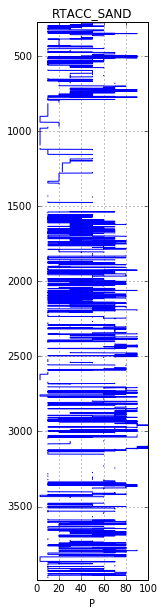

In [12]:
w.curves['RTACC_SAND'].plot()

In [24]:
depth = w.las.curves['DEPT']

In [36]:
w.las.

In [26]:
import matplotlib.pyplot as plt

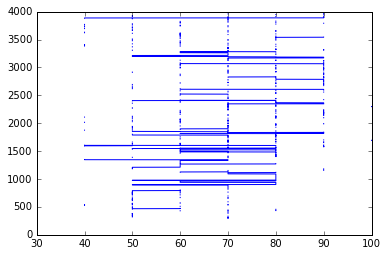

In [28]:
plt.plot(shale.data, depth.data)

In [ ]:
import numpy as np

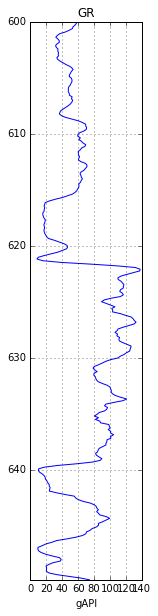

In [43]:
segment = w.curves['GR'].segment((600,650))

segment.plot()

# Make a blocky log

In [49]:
import matplotlib.pyplot as plt

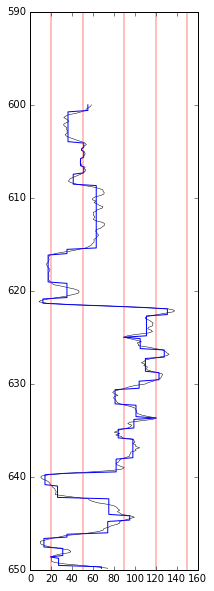

In [63]:
bins=[20,50,90,120,150]
block = segment.block(bins=bins, function=np.mean)

f = plt.figure(figsize=(3,10))
plt.plot(segment.data, segment.basis, 'k', lw=0.5)
plt.plot(block.data, block.basis, 'b', lw=1)
for i in bins:
    plt.axvline(x=i, ymin=0, ymax = 150, linewidth=2, color='r', alpha=0.25)
plt.gca().invert_yaxis()
plt.grid('off')

In [73]:
GR = w.curves['GR']
GR.step

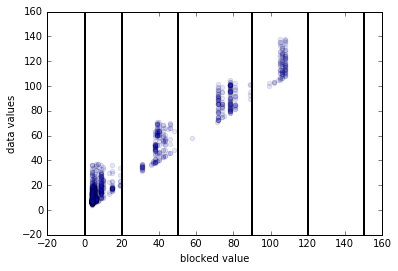

In [40]:

plt.scatter(block.data, segment.data, alpha=0.1)
for i in bins:
    plt.axvline(x=i, ymin=0, ymax = 150, linewidth=2, color='k')
plt.xlabel('blocked value')
plt.ylabel('data values')

In [172]:
t1, b1 = 600, 650
t2, b2 = 700, 750

# grabs some segments of the log
segment1 = w.curves['GR'].segment((t1,b1))
segment2 = w.curves['GR'].segment((t2,b2))
segment12 = w.curves['GR'].segment((t1,b2)) # segment with no gaps

# make some gaps
gapspan = 82
dgap = gapspan*0.1524
missing_top = np.full(gapspan, np.nan)  # this is approximately 12.5 m worth of samples
missing_bottom = np.full(gapspan, np.nan)  # this is approximately 12.5 m worth of samples
gap = np.full(4*gapspan, np.nan)  # this is approximately 12.5 m worth of samples

# concate it all together
gapdata = np.hstack([missing_top, 
                     segment1.data, 
                     gap, 
                     segment2.data, 
                     missing_bottom])

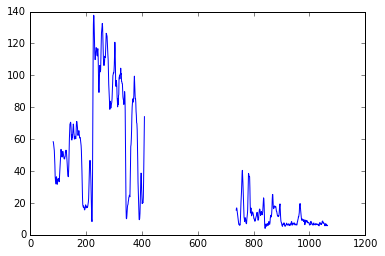

In [173]:
plt.plot(gapdata)

In [174]:
print(len(gapdata))

1148


In [175]:
md = np.linspace(t1-dgap,b2+dgap,len(gapdata))

print (len(md))


1148


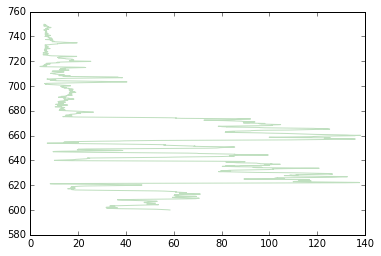

In [179]:
plt.plot(segment12.data, segment12.basis,'g',alpha=0.25) # segment w.o. gaps

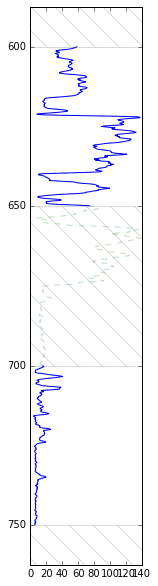

In [182]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(2,10))
ax = fig.add_subplot(111)
ax.plot(segment12.data, segment12.basis,'g--',alpha=0.25) # segment w.o. gaps
ax.plot(gapdata, md)

for i,j in zip([t1-dgap,b1,b2],[t1,t2,b2+dgap]):
    ax.add_patch(patches.Rectangle(
                (0, i),   # (x,y)
                140, j-i,    # height
                hatch='\\',
                facecolor='white', alpha=0.15) )

ax.set_ylim(t1-dgap, b2+dgap)

ax.invert_yaxis()


In [171]:
data_w_gaps = np.vstack([md, gapdata])
np.save('data_w_null_gaps', data_w_gaps)

### Keep start and stop but resample

In [ ]:
Change start and 